In [1]:
# Demo for visualisation of crop type and yield data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#3D stuff
from IPython.core.display import display, HTML
import json

import geopandas as gpd
import geojson
import pandas as pd

from functools import partial
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface
from sklearn import preprocessing
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import matplotlib.ticker as mticker
from matplotlib.cm import ScalarMappable

#!pip install matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")

import rasterio as rio
import json
from pyproj import Transformer
import numpy as np

import warnings
warnings.filterwarnings("ignore")

tqdm.pandas()

/tmp/ipykernel_1826/863968987.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
fields =  ['Baumacker', 'D8', 'Dichtlacker', 'Heindlacker', 'Heng', 
                            'Holzacker', 'Neulandsiedlung','Itzling2', 'Itzling5', 
                            'Itzling6', 'Schluetterfabrik', 'Thalhausen138', 
                            'Thalhausen141', 'Voettingerfeld']
                            
field_summary = pd.read_excel("../data/cropdata/Bavaria/yields/fields_summary.xlsx")
yields_2018 = pd.read_csv("../data/cropdata/Bavaria/yields/yields2018.csv")

boolean_series = field_summary.Name.isin(fields)
boolean_series_yields = yields_2018.Name.isin(fields)
field_summary = field_summary[boolean_series]
yields_2018 = yields_2018[boolean_series_yields]

print(field_summary['Ertrag'].mean())
print(field_summary['ErtragNass'].mean())

NameError: name 'fields' is not defined

In [ ]:
field_summary

,Unnamed: 0,Name,Jahr,Ertrag,ErtragNass,Type,Latitude,Longitude,Duenger_1,N_1,...,Datum_3,Duenger_4,N_4,P_4,K_4,Datum_4,Aussaat,Ernte,TAG,Polygon
0,2,Baumacker,2018,90.000000,81.277435,WW,48.429650,11.731419,2.4,57.58,...,2018-05-07,1.85,49.94,NaN,NaN,2018-05-28,2017-10-16,2018-07-28,UNI,"POLYGON ((11.73174976472932 48.42917812892937,..."
4,9,D8,2018,67.000000,67.366006,WW,48.400677,11.705567,2.4,57.58,...,2018-05-08,1.85,49.94,NaN,NaN,2018-05-29,2017-10-18,2018-07-27,UNI,"POLYGON ((11.70613462952051 48.40047659402558,..."
5,10,Dichtlacker,2018,58.515511,58.515511,WW,48.382564,11.726162,NaN,NaN,...,2018-05-22,NaN,NaN,NaN,NaN,NaN,2017-10-10,NaN,UNI,"POLYGON ((11.72614981180946 48.38255434857475,..."
11,23,Heindlacker,2018,75.527846,75.527846,WW,48.378286,11.722503,NaN,NaN,...,2018-05-22,NaN,NaN,NaN,NaN,NaN,2017-10-10,NaN,UNI,"POLYGON ((11.72278836438807 48.37841864847829,..."
12,24,Heng,2018,60.000000,64.794871,WW,48.401141,11.682885,2.4,57.64,...,2018-05-08,1.85,49.93,NaN,NaN,2018-05-29,2017-10-18,2018-07-27,UNI,"POLYGON ((11.68388328444869 48.40116271163492,..."
13,27,Holzacker,2018,68.000000,62.466652,WW,48.401693,11.681632,2.4,57.72,...,2018-05-08,1.85,49.90,NaN,NaN,2018-05-29,2017-10-18,2018-07-30,UNI,"POLYGON ((11.68119331683706 48.40193570758964,..."
14,28,Itzling2,2018,88.000000,77.517366,WW,48.433147,11.731174,2.4,57.60,...,2018-05-07,1.85,49.90,NaN,NaN,2018-05-28,2017-10-16,2018-07-28,UNI,"POLYGON ((11.73280030613031 48.43365111393373,..."
16,30,Itzling5,2018,81.000000,85.293056,WW,48.435757,11.738799,2.4,57.58,...,2018-05-07,1.85,49.93,NaN,NaN,2018-05-28,2017-10-16,2018-07-28,UNI,"POLYGON ((11.73897921190761 48.43291523976936,..."
17,31,Itzling6,2018,80.000000,78.922790,WW,48.434547,11.741659,2.4,57.63,...,2018-05-07,1.85,49.87,NaN,NaN,2018-05-28,2017-10-17,2018-07-28,UNI,"POLYGON ((11.7417346721752 48.4345314624592, 1..."
20,40,Neulandsiedlung,2018,74.615691,74.615691,WW,48.391021,11.726746,NaN,NaN,...,2018-05-22,NaN,NaN,NaN,NaN,NaN,2017-10-10,NaN,UNI,"POLYGON ((11.72682770250133 48.39103514670568,..."


0 Baumacker
1 D8
2 Dichtlacker
3 Heindlacker
4 Heng
5 Holzacker
6 Neulandsiedlung
7 Itzling2
8 Itzling5
9 Itzling6
10 Schluetterfabrik
11 Thalhausen138


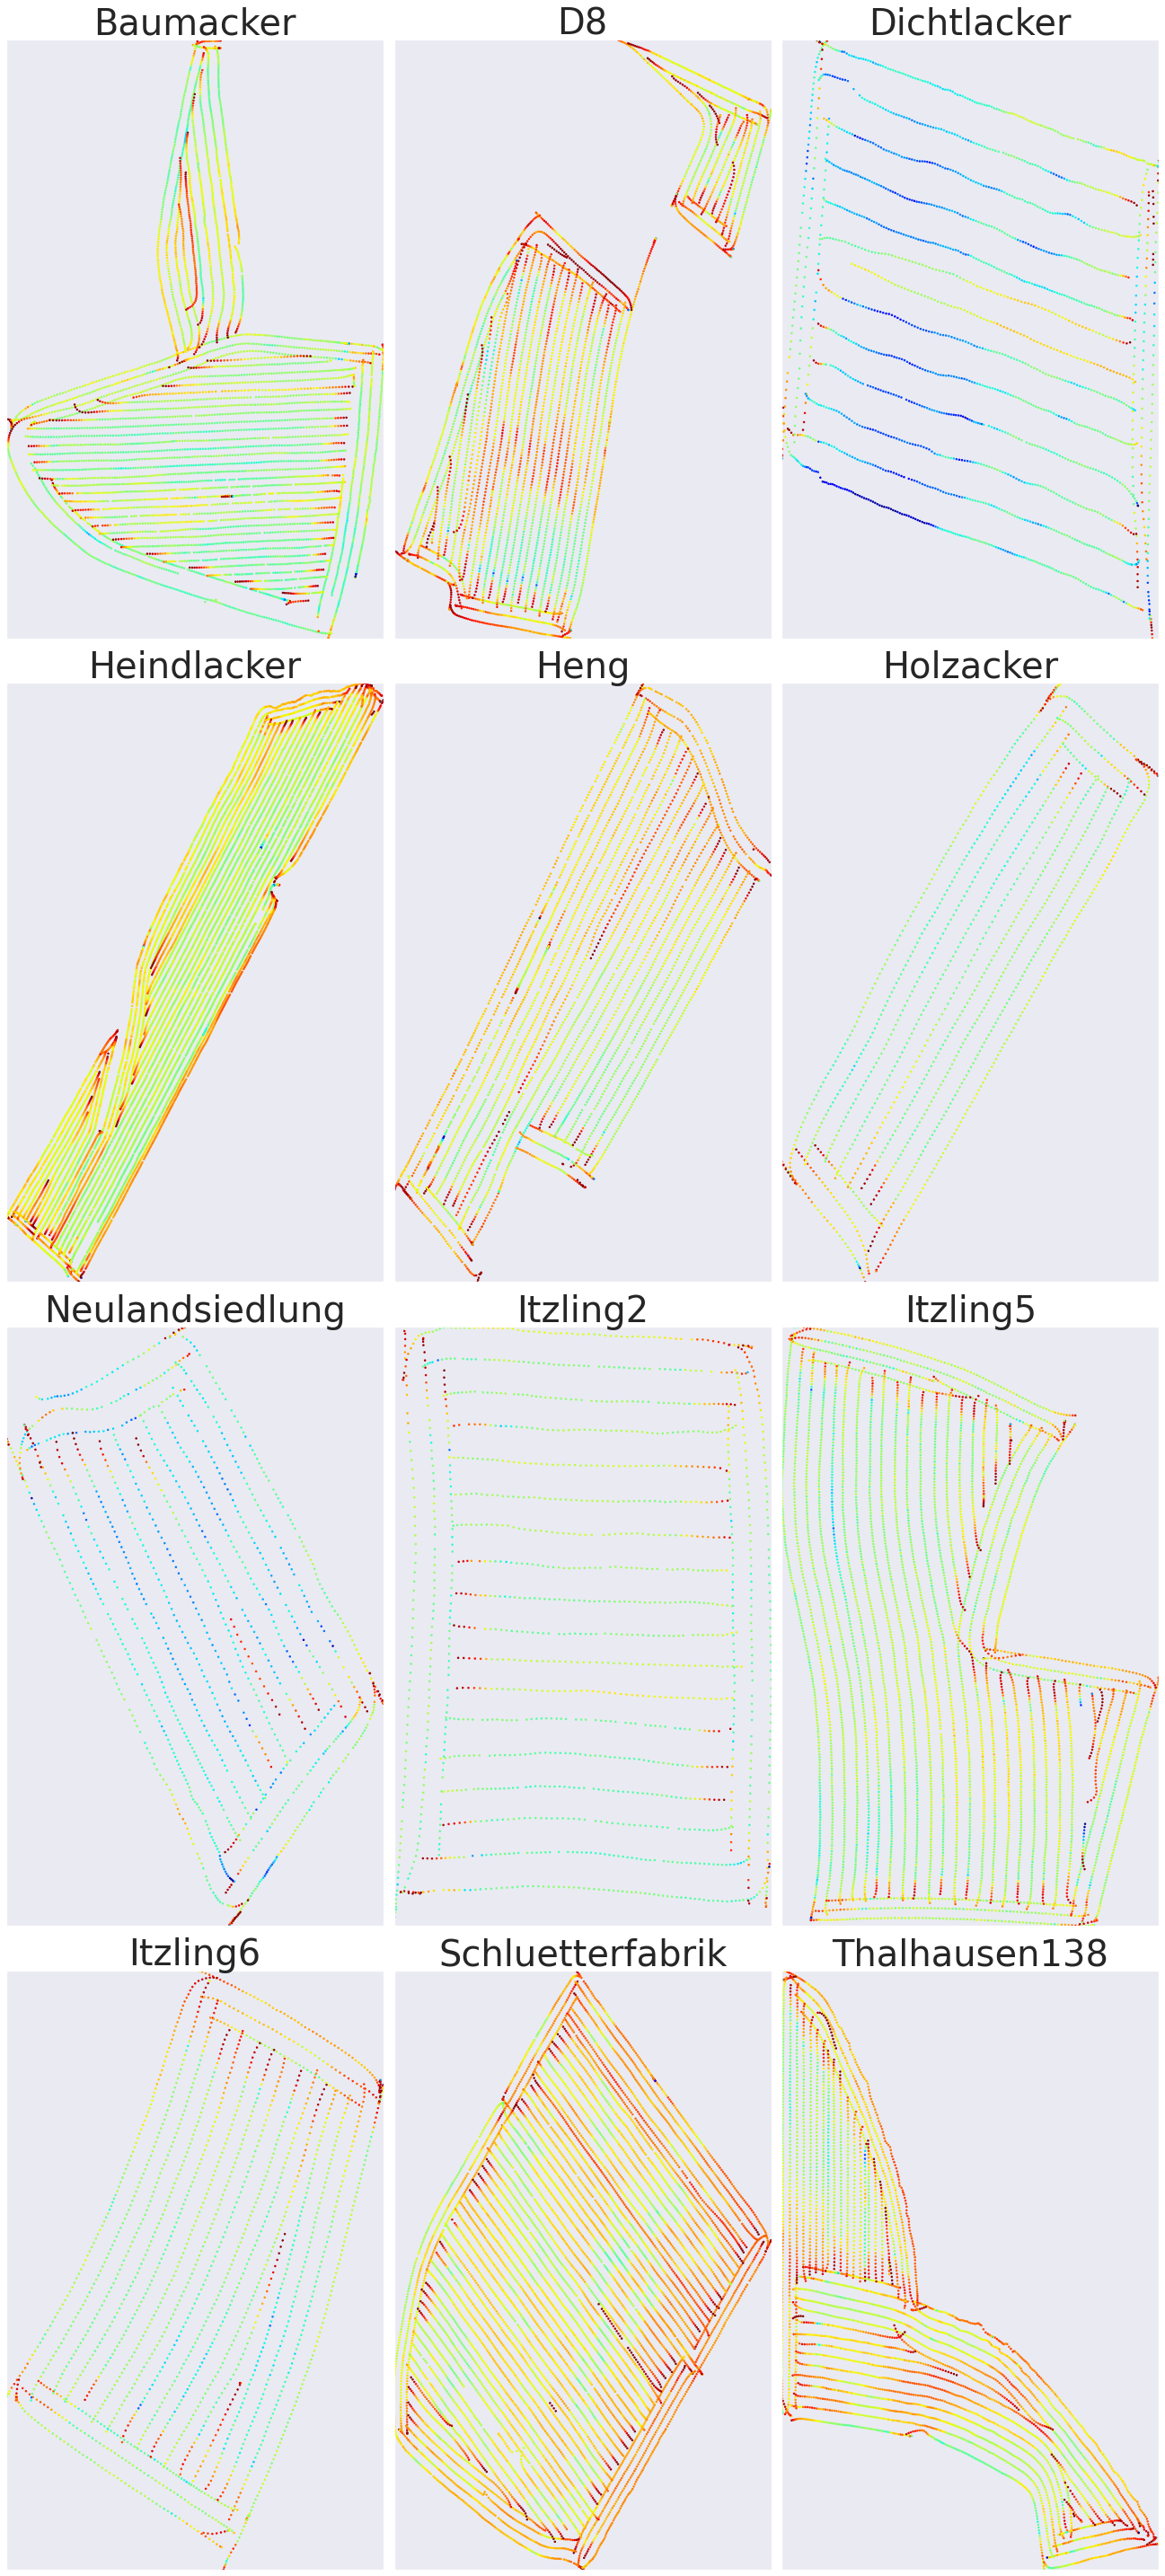

In [ ]:


f,((ax1, ax2, ax3), (ax4, ax5,ax6), (ax7, ax8, ax9), (ax10, ax11,ax12)) = plt.subplots(4, 3,figsize=(20, 40))
ax_list=['ax'+ str(i+1) for i in range(len(fields))]
ax_list = ax_list[0:12]
ax_list = [globals()[var] for var in ax_list]

size=40

for i in range(len(fields)-2):
    print(i, fields[i])
    field = yields_2018[yields_2018.Name == fields[i]]
    #print(i,names[i])
    geometry = [Point(xy) for xy in zip(field.Longitude, field.Latitude)]
    crs = {'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(field, crs=crs, geometry=geometry)

    minx, miny, maxx, maxy = gdf.total_bounds
    ax_list[i].set_xlim(minx, maxx)
    ax_list[i].set_ylim(miny, maxy)
    ax_list[i].axes.get_xaxis().set_visible(False)
    ax_list[i].axes.get_yaxis().set_visible(False)
    txt = fields[i]
    ax_list[i].set_title(txt, fontsize=size)
    ax_list[i].scatter(y=field.Latitude, x=field.Longitude, alpha=1,cmap=plt.get_cmap("jet_r"), c=field['Ertr.masse (Nass)(tonne/ha)'],s=2.2)
    
#plt.xlabel("Test")
#plt.ylabel("common Y")

#cb_ax = f.add_axes([0.92, 0.05, 0.02, 0.9])
#cb_ax.tick_params(labelsize=40) 
#f.colorbar(plot, cax=cb_ax)

f.tight_layout() 
f.subplots_adjust(right=0.9)

plt.show()

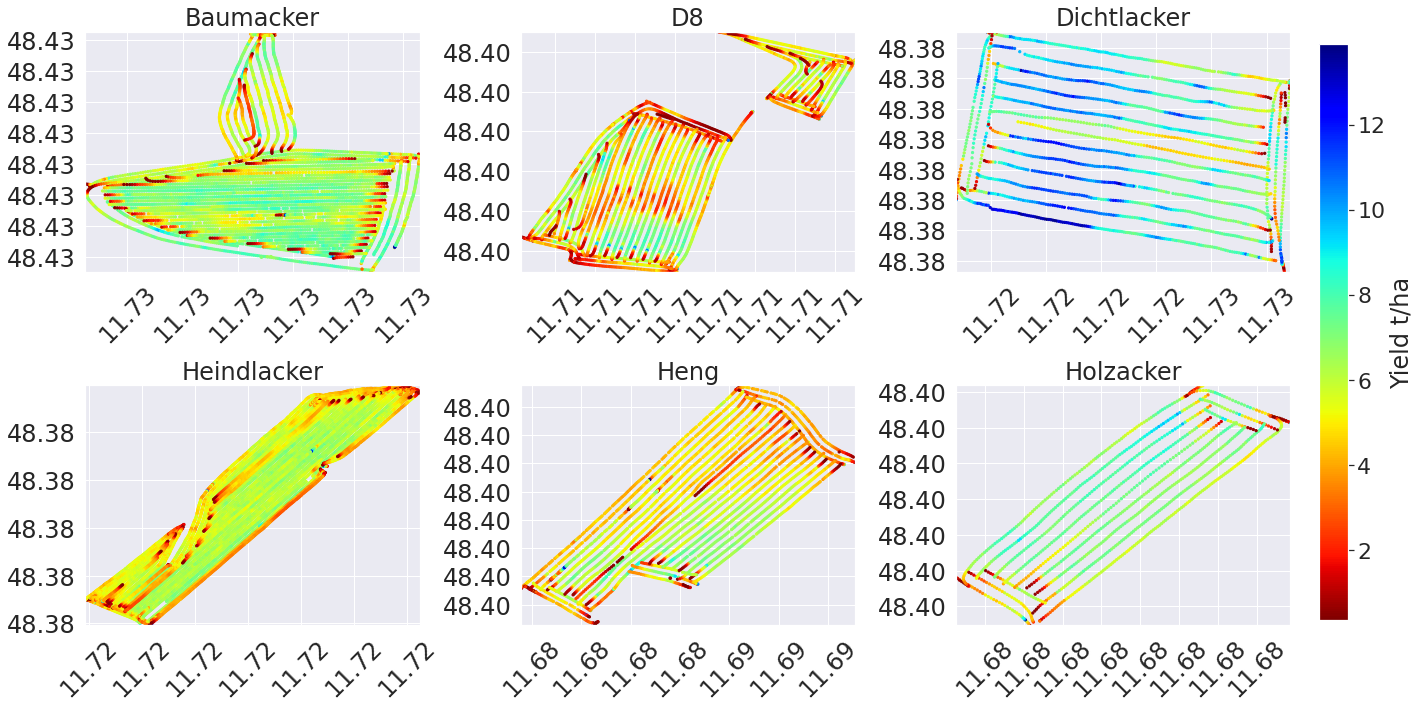

In [3]:
f,( (ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(2, 3,figsize=(20, 10))
ax_list=[ ax1, ax2,ax3, ax4, ax5,ax6]
fields =  ['Baumacker', 'D8', 'Dichtlacker', 'Heindlacker', 'Heng', 'Holzacker']
size = 24                       
for i in range(len(fields)):
    field = yields_2018[yields_2018.Name == fields[i]]
    #field = field.round(2)
    #print(i,names[i])
    geometry = [Point(xy) for xy in zip(field.Longitude, field.Latitude)]
    crs = {'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(field, crs=crs, geometry=geometry)

    #gdf.plot(facecolor="none",ax=ax)gpd.plot()
    #add_basemap(ax, zoom=14)
    minx, miny, maxx, maxy = gdf.total_bounds
    #print(ax_list[i])
    ax_list[i].set_xlim(minx, maxx)
    ax_list[i].set_ylim(miny, maxy)
    ax_list[i].axes.get_xaxis().set_visible(True)
    ax_list[i].axes.get_yaxis().set_visible(True)
    txt = fields[i]
    ax_list[i].set_title(txt, fontsize=size)

    
    x = field[['Ertr.masse (Nass)(tonne/ha)']] #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    
    plot = ax_list[i].scatter(y=gdf.Latitude, x=gdf.Longitude, alpha=1,cmap=plt.get_cmap("jet_r"), c=field['Ertr.masse (Nass)(tonne/ha)'],s=5)
    #ax_list[i].xaxis.set_major_formatter(mticker.ScalarFormatter())
    #ax_list[i].get_xaxis().get_major_formatter().set_scientific(False)
    
    ax_list[i].yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
    ax_list[i].yaxis.set_minor_formatter(NullFormatter())
    ax_list[i].xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
    ax_list[i].xaxis.set_minor_formatter(NullFormatter())

for i in range(len(fields)):
    plt.setp(ax_list[i].get_xticklabels(), fontsize=size, rotation = 45)
    plt.setp(ax_list[i].get_yticklabels(), fontsize=size)

cb_ax = f.add_axes([0.92, 0.13, 0.02, 0.8])
cb_ax.tick_params(labelsize=22) 
f.colorbar(plot, cax=cb_ax)
f.tight_layout() 
f.subplots_adjust(right=0.9)
plt.ylabel("Yield t/ha",fontsize=size)

plt.show()
bilder = 'harvester_yields_used.png'
f.savefig(bilder, dpi=500)



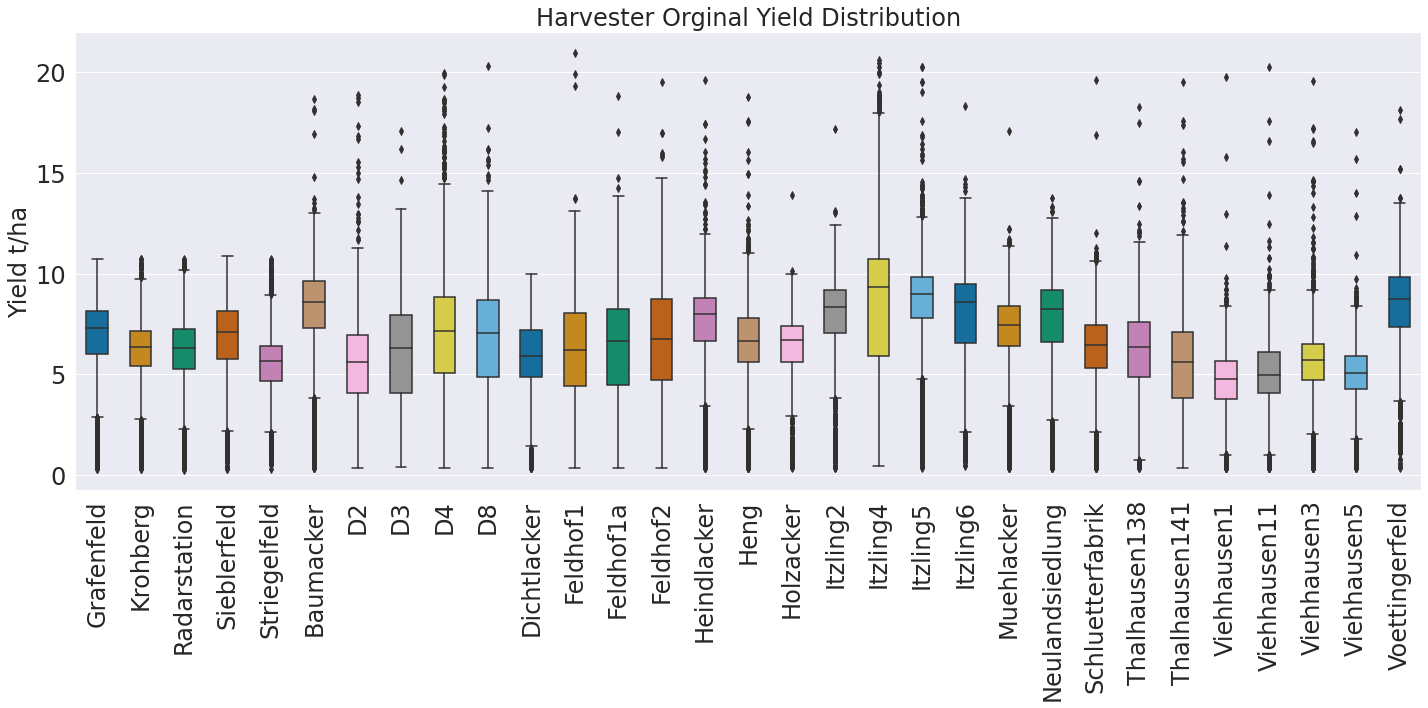

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
#yields_2018['Ertr.masse (Nass)(tonne/ha)'] = yields_2018['Ertr.masse (Nass)(tonne/ha)']*10
bplot = sns.boxplot(y='Ertr.masse (Nass)(tonne/ha)', x ='Name', data = yields_2018, width=0.5, palette="colorblind")
size=24

labels = yields_2018['Name'].drop_duplicates( keep='first', inplace=False)
#print(labels)
bplot.set_xticklabels(labels,rotation=90)

bplot.axes.set_title("Harvester Orginal Yield Distribution",
                    fontsize=size)
 
bplot.set_xlabel("", 
                fontsize=size)
 
bplot.set_ylabel("Yield t/ha",
                fontsize=size)
 
bplot.tick_params(labelsize=size)

# output file name
plot_file_name = 'yields_bplot.png'
 
# save as jpeg
#bplot.figure.savefig(plot_file_name,format='png',dpi=200)
#bplot.savefig(plot_file_name, dpi=200)
fig.tight_layout() 
plt.savefig(plot_file_name, dpi=200)